<a href="https://colab.research.google.com/github/Udaykamal2005/OIBSIP/blob/main/Project_3_Proposal_Level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Run once if not installed already
!pip install -q folium plotly scikit-learn


In [ ]:
# Upload using your method (exactly as you asked)
from google.colab import files
import io
import pandas as pd
import numpy as np

uploaded = files.upload()   # choose AB_NYC_2019.csv when prompted
filename = next(iter(uploaded))
print("Uploaded file:", filename)

# Read the CSV - this will work in Colab after files.upload()
try:
    df = pd.read_csv(filename)
except Exception as e:
    # fallback: read from bytes (sometimes necessary)
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
print("Loaded DataFrame shape:", df.shape)
df.head()


Saving AB_NYC_2019.csv to AB_NYC_2019.csv
Uploaded file: AB_NYC_2019.csv
Loaded DataFrame shape: (48895, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Quick info
print("Columns:", df.columns.tolist())
print("\nData types:")
display(df.dtypes)
print("\nMissing values per column:")
display(df.isnull().sum())


Columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Data types:


,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64



Missing values per column:


,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


In [ ]:
# Normalize column names
df.columns = [c.strip().lower().replace(' ', '_') for c in df.columns]
print("Normalized columns:", df.columns.tolist())

# Convert last_review to datetime if present
if 'last_review' in df.columns:
    df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
    print("Parsed last_review to datetime. Example:", df['last_review'].dtype)

# Ensure numeric columns are numeric
num_cols = ['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# Remove obvious duplicates (exact duplicates)
dup_count = df.duplicated().sum()
print("Exact duplicate rows:", dup_count)
if dup_count > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print("Dropped duplicates; new shape:", df.shape)


Normalized columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
Parsed last_review to datetime. Example: datetime64[ns]
Exact duplicate rows: 0


In [ ]:
# Numeric describe
display(df.select_dtypes(include=[np.number]).describe().T)

# Top 10 most expensive listings
if 'price' in df.columns:
    print("Top 10 most expensive listings:")
    display(df.sort_values('price', ascending=False).loc[:, ['name','neighbourhood_group','neighbourhood','room_type','price']].head(10))

# Price distribution stats
if 'price' in df.columns:
    print("Price - mean, median, max:", df['price'].mean(), df['price'].median(), df['price'].max())

# Listings per neighbourhood_group
if 'neighbourhood_group' in df.columns:
    print("\nListings per neighbourhood_group:")
    display(df['neighbourhood_group'].value_counts())


,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


Top 10 most expensive listings:


,name,neighbourhood_group,neighbourhood,room_type,price
29238,1-BR Lincoln Center,Manhattan,Upper West Side,Entire home/apt,10000
9151,Furnished room in Astoria apartment,Queens,Astoria,Private room,10000
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Greenpoint,Entire home/apt,10000
6530,Spanish Harlem Apt,Manhattan,East Harlem,Entire home/apt,9999
40433,2br - The Heart of NYC: Manhattans Lower East ...,Manhattan,Lower East Side,Entire home/apt,9999
12342,"Quiet, Clean, Lit @ LES & Chinatown",Manhattan,Lower East Side,Private room,9999
30268,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,Manhattan,Tribeca,Entire home/apt,8500
4377,Film Location,Brooklyn,Clinton Hill,Entire home/apt,8000
29662,East 72nd Townhouse by (Hidden by Airbnb),Manhattan,Upper East Side,Entire home/apt,7703
42523,70' Luxury MotorYacht on the Hudson,Manhattan,Battery Park City,Entire home/apt,7500


Price - mean, median, max: 152.7206871868289 106.0 10000

Listings per neighbourhood_group:


,count
neighbourhood_group,
Manhattan,21661
Brooklyn,20104
Queens,5666
Bronx,1091
Staten Island,373


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,5)

# 1) Price histogram (limit to reasonable range to avoid outlier distortion)
if 'price' in df.columns:
    plt.figure()
    sns.histplot(df[df['price']<=1000]['price'], bins=50)  # clip very large outliers
    plt.title("Price distribution (<= 1000)")
    plt.xlabel("Price ($)")
    plt.show()

# 2) Boxplot of price by room_type
if all(c in df.columns for c in ['price','room_type']):
    plt.figure(figsize=(10,6))
    sns.boxplot(x='room_type', y='price', data=df[df['price']<=1000])
    plt.title("Price by room type (outliers clipped)")
    plt.yscale('log')  # optional: log scale to see spread
    plt.show()

# 3) Average price by neighbourhood_group
if 'neighbourhood_group' in df.columns:
    avg_price = df.groupby('neighbourhood_group')['price'].mean().sort_values()
    plt.figure()
    avg_price.plot(kind='bar')
    plt.ylabel("Average Price")
    plt.title("Average Price by Neighbourhood Group")
    plt.show()


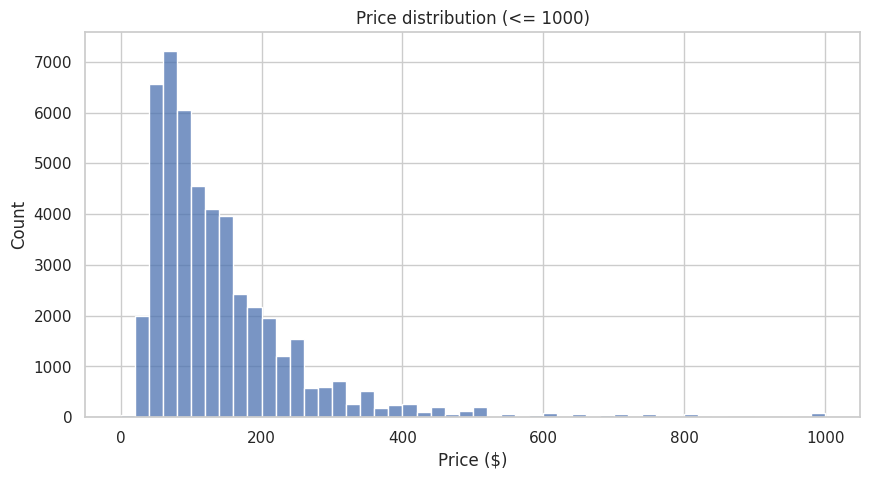

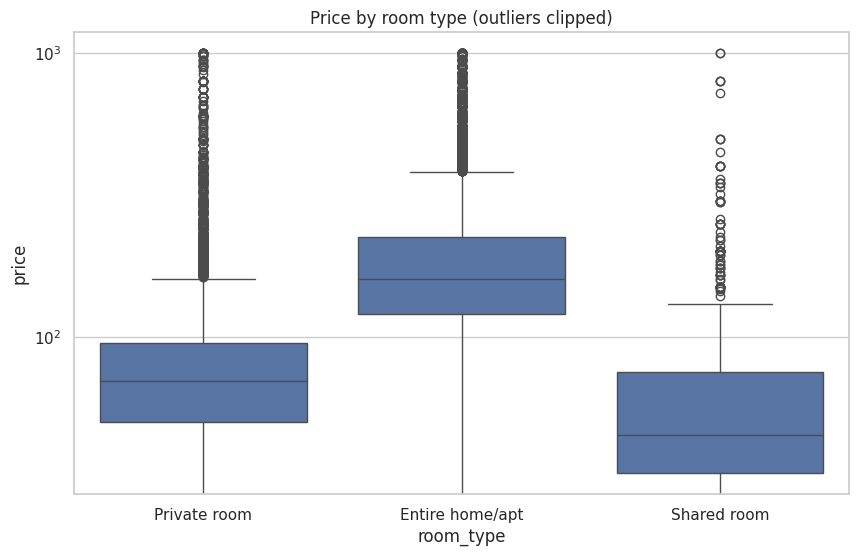

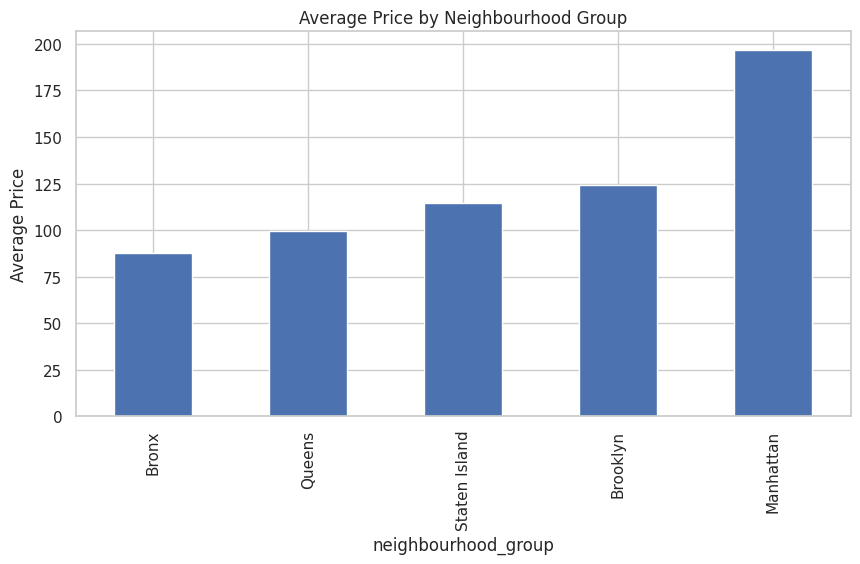

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,5)

# 1) Price histogram (limit to reasonable range to avoid outlier distortion)
if 'price' in df.columns:
    plt.figure()
    sns.histplot(df[df['price']<=1000]['price'], bins=50)  # clip very large outliers
    plt.title("Price distribution (<= 1000)")
    plt.xlabel("Price ($)")
    plt.show()

# 2) Boxplot of price by room_type
if all(c in df.columns for c in ['price','room_type']):
    plt.figure(figsize=(10,6))
    sns.boxplot(x='room_type', y='price', data=df[df['price']<=1000])
    plt.title("Price by room type (outliers clipped)")
    plt.yscale('log')  # optional: log scale to see spread
    plt.show()

# 3) Average price by neighbourhood_group
if 'neighbourhood_group' in df.columns:
    avg_price = df.groupby('neighbourhood_group')['price'].mean().sort_values()
    plt.figure()
    avg_price.plot(kind='bar')
    plt.ylabel("Average Price")
    plt.title("Average Price by Neighbourhood Group")
    plt.show()


In [ ]:
# Availability distribution
if 'availability_365' in df.columns:
    plt.figure()
    sns.histplot(df['availability_365'], bins=30)
    plt.title("Availability (days per year)")
    plt.show()

# Reviews vs price scatter
if all(c in df.columns for c in ['number_of_reviews','price']):
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='number_of_reviews', y='price', data=df.sample(min(2000, len(df)), random_state=1))
    plt.title("Number_of_reviews vs Price (sample)")
    plt.ylim(0, 1000)
    plt.show()


In [ ]:
# If folium is installed, show a simple map with sample markers
try:
    import folium
    # center at NYC mean lat/lon
    center = [df['latitude'].mean(), df['longitude'].mean()]
    m = folium.Map(location=center, zoom_start=11)
    sample = df.sample(300, random_state=1).dropna(subset=['latitude','longitude'])
    for _, row in sample.iterrows():
        folium.CircleMarker(location=[row['latitude'], row['longitude']],
                            radius=3,
                            popup=f"{row.get('name','')} | {row.get('neighbourhood','')}",
                            fill=True).add_to(m)
    # display map in Colab
    m
except Exception as e:
    print("Folium map skipped (not available):", e)


Folium map skipped (not available): 'latitude'


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare features: latitude, longitude, price (clip price to avoid huge outliers)
feat = df[['latitude','longitude','price']].dropna().copy()
feat = feat[feat['price'] <= 2000]  # remove extreme price outliers
X = feat.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose k (example k=5)
k = 5
km = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = km.fit_predict(X_scaled)
feat['cluster'] = labels

# Show cluster sizes and cluster centers (inverse transform)
print("Cluster sizes:")
display(feat['cluster'].value_counts().sort_index())

centers = scaler.inverse_transform(km.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=['latitude','longitude','price'])
print("Cluster centers (lat, lon, price):")
display(centers_df)


KeyError: "None of [Index(['latitude', 'longitude', 'price'], dtype='object')] are in the [columns]"

DATASET-2


In [ ]:
# Cell 1: Upload dataset files from your local machine
from google.colab import files
uploaded = files.upload()                 # Use the UI that appears to upload all CSVs + CA_category_id.json

# Print uploaded files
print("Uploaded files:")
for fname in uploaded.keys():
    print("-", fname)


Saving CA_category_id.json to CA_category_id (2).json
Uploaded files:
- CA_category_id (2).json


In [ ]:
# Cell 2: Install necessary libraries (only if missing), then import
!pip install -q wordcloud textblob

import os
import json
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

# Configure plots to display inline
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
sns.set_style("whitegrid")


In [ ]:
# Cell 5: Load category JSON (e.g., CA_category_id.json) and create a mapping
json_file = None
for fname in uploaded.keys():
    if fname.lower().endswith('category_id.json') or fname.lower().endswith('.json'):
        json_file = fname
        break

if json_file is None:
    print("Category JSON not uploaded. If you have one, upload CA_category_id.json or similar.")
else:
    with open(json_file, 'r', encoding='utf-8') as f:
        cat_data = json.load(f)
    # cat_data likely has structure with 'items' / 'snippet' / 'title'
    categories = {}
    try:
        for item in cat_data['items']:
            categories[int(item['id'])] = item['snippet']['title']
        print("Loaded category mapping from", json_file)
    except Exception as e:
        print("Error parsing JSON:", e)
        categories = {}

# Show sample mapping
list(categories.items())[:10]


Loaded category mapping from CA_category_id (2).json


[(1, 'Film & Animation'),
 (2, 'Autos & Vehicles'),
 (10, 'Music'),
 (15, 'Pets & Animals'),
 (17, 'Sports'),
 (18, 'Short Movies'),
 (19, 'Travel & Events'),
 (20, 'Gaming'),
 (21, 'Videoblogging'),
 (22, 'People & Blogs')]

In [ ]:
# Cell 7: Convert publish_time to datetime, trending_date to proper date

# Ensure the correct DataFrame (USvideos.csv) is loaded if 'publish_time' is missing
if 'publish_time' not in df.columns:
    print("Warning: 'publish_time' column not found. Attempting to load 'USvideos.csv'...")
    try:
        df = pd.read_csv('USvideos.csv')
        print("Successfully loaded USvideos.csv.")
    except FileNotFoundError:
        print("Error: USvideos.csv not found. Please ensure the file is uploaded or available.")
    except Exception as e:
        print(f"Error loading USvideos.csv: {e}")

# trending_date in dataset may be like '17.14.11' (yy.dd.mm or other); handle common formats
# We'll parse publish_time (ISO) and trending_date (try multiple formats)
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# trending_date: try to coerce common known format from dataset: YYYY-DD-MM or YY.DD.MM
def parse_trending(x):
    for fmt in ("%y.%d.%m", "%Y-%m-%d", "%d.%m.%Y", "%Y.%m.%d"):
        try:
            return pd.to_datetime(x, format=fmt)
        except:
            continue
    return pd.NaT

df['trending_date_parsed'] = df['trending_date'].astype(str).apply(parse_trending)
print("publish_time nulls:", df['publish_time'].isna().sum(),
      "trending_date_parsed nulls:", df['trending_date_parsed'].isna().sum())

# Ensure numeric columns are numeric
for col in ['views','likes','dislikes','comment_count']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

Successfully loaded USvideos.csv.
publish_time nulls: 0 trending_date_parsed nulls: 0


In [ ]:
# Cell 3: Upload and load a single CSV file the easy way

from google.colab import files
uploaded = files.upload()      # This opens the file picker so you can choose your CSV

# Automatically load the first uploaded CSV into df
import pandas as pd

for fname in uploaded.keys():
    if fname.lower().endswith('.csv'):
        print(f"\nLoading file: {fname}")
        df = pd.read_csv(fname)
        print("Loaded successfully!")
        print("Shape of the DataFrame:", df.shape)
        break
else:
    print("No CSV file uploaded. Please upload a .csv file.")

# Display first 5 rows
df.head()


Saving USvideos.csv to USvideos (1).csv

Loading file: USvideos (1).csv
Loaded successfully!
Shape of the DataFrame: (40949, 16)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [ ]:
# Cell 4: Inspect the loaded df

print("Shape of df:", df.shape)
display(df.head())
df.info()


Shape of df: (40949, 16)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [ ]:
# Cell 5: Load category JSON (e.g., CA_category_id.json) and create a mapping
json_file = None
for fname in uploaded.keys():
    if fname.lower().endswith('category_id.json') or fname.lower().endswith('.json'):
        json_file = fname
        break

if json_file is None:
    print("Category JSON not uploaded. If you have one, upload CA_category_id.json or similar.")
else:
    with open(json_file, 'r', encoding='utf-8') as f:
        cat_data = json.load(f)
    # cat_data likely has structure with 'items' / 'snippet' / 'title'
    categories = {}
    try:
        for item in cat_data['items']:
            categories[int(item['id'])] = item['snippet']['title']
        print("Loaded category mapping from", json_file)
    except Exception as e:
        print("Error parsing JSON:", e)
        categories = {}

# Show sample mapping
list(categories.items())[:10]


Category JSON not uploaded. If you have one, upload CA_category_id.json or similar.


[(1, 'Film & Animation'),
 (2, 'Autos & Vehicles'),
 (10, 'Music'),
 (15, 'Pets & Animals'),
 (17, 'Sports'),
 (18, 'Short Movies'),
 (19, 'Travel & Events'),
 (20, 'Gaming'),
 (21, 'Videoblogging'),
 (22, 'People & Blogs')]

In [ ]:
# Cell 6: Map category_id to readable names in df
if 'category_id' in df.columns and categories:
    df['category_name'] = df['category_id'].astype(int).map(categories)
    print("Added 'category_name' column. Example values:")
    display(df[['category_id','category_name']].drop_duplicates().head(10))
else:
    print("No category_id in dataset or no categories mapping found.")


Added 'category_name' column. Example values:


,category_id,category_name
0,22,People & Blogs
1,24,Entertainment
2,23,Comedy
5,28,Science & Technology
8,1,Film & Animation
9,25,News & Politics
10,17,Sports
12,10,Music
14,15,Pets & Animals
17,27,Education


In [ ]:
from google.colab import files
uploaded = files.upload()   # upload your JSON file here


Saving CA_category_id.json to CA_category_id (3).json


In [ ]:
# Load the category JSON file
import json

# Identify JSON file
json_file = None
for fname in uploaded.keys():
    if fname.lower().endswith('.json'):
        json_file = fname
        break

if json_file is None:
    print("❌ No JSON file uploaded. Please upload US_category_id.json or CA_category_id.json")
else:
    print("Using category file:", json_file)

    with open(json_file, 'r', encoding='utf-8') as f:
        cat_data = json.load(f)

    # Build mapping: category_id → category_name
    categories = {}
    for item in cat_data['items']:
        categories[int(item['id'])] = item['snippet']['title']

    print("Category mapping sample:", list(categories.items())[:5])

    # Add category_name column to df
    df['category_name'] = df['category_id'].astype(int).map(categories)

    print("\nColumn 'category_name' created successfully! 🙌")
    print(df[['category_id', 'category_name']].head())


Using category file: CA_category_id (3).json
Category mapping sample: [(1, 'Film & Animation'), (2, 'Autos & Vehicles'), (10, 'Music'), (15, 'Pets & Animals'), (17, 'Sports')]

Column 'category_name' created successfully! 🙌
   category_id   category_name
0           22  People & Blogs
1           24   Entertainment
2           23          Comedy
3           24   Entertainment
4           24   Entertainment


category_name
Music                   40132892190
Entertainment           20604388195
Film & Animation         7284156721
Comedy                   5117426208
People & Blogs           4917191726
Sports                   4404456673
Howto & Style            4078545064
Science & Technology     3487756816
Gaming                   2141218625
News & Politics          1473765704
Name: views, dtype: int64


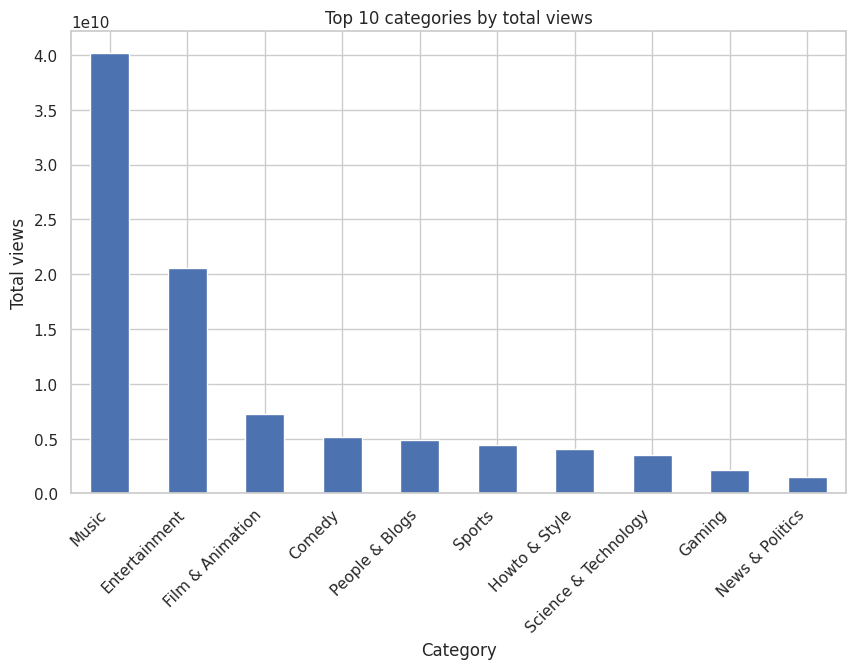

In [ ]:
# Cell 8: Top 10 categories by total views
cat_views = df.groupby('category_name')['views'].sum().sort_values(ascending=False).dropna().head(10)
print(cat_views)
cat_views.plot(kind='bar')
plt.title("Top 10 categories by total views")
plt.ylabel("Total views")
plt.xlabel("Category")
plt.xticks(rotation=45, ha='right')
plt.show()


channel_title
ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
TheEllenShow                              193
Vox                                       193
Netflix                                   193
The Late Show with Stephen Colbert        187
Jimmy Kimmel Live                         186
Late Night with Seth Meyers               183
Screen Junkies                            182
NBA                                       181
Name: count, dtype: int64


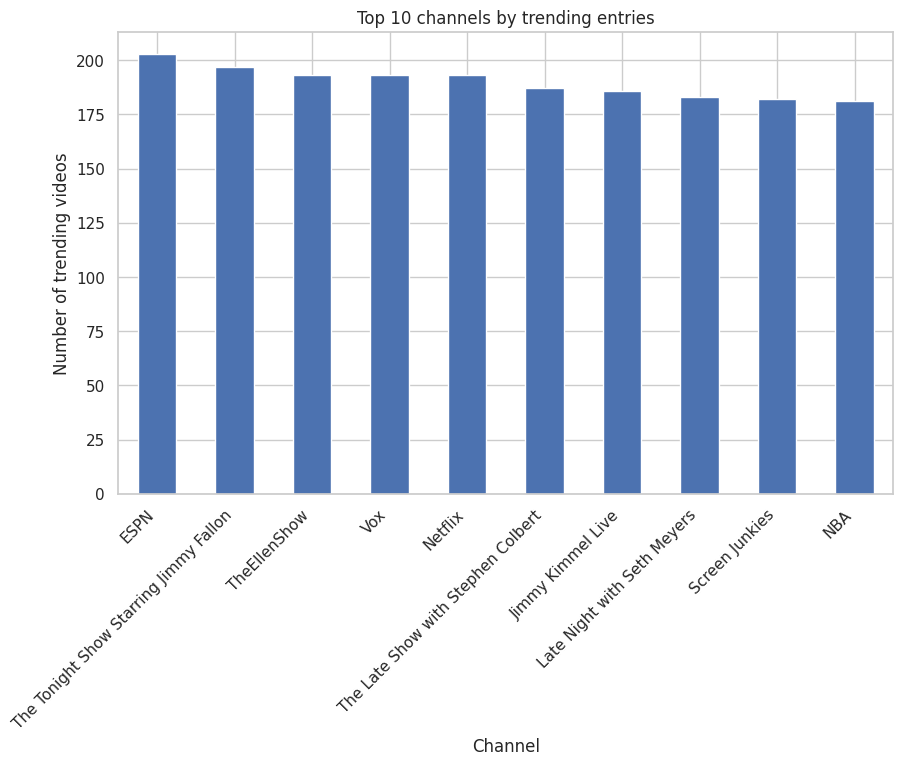

In [ ]:
# Cell 9: Top 10 channels with most trending entries
top_channels = df['channel_title'].value_counts().head(10)
print(top_channels)
top_channels.plot(kind='bar')
plt.title("Top 10 channels by trending entries")
plt.ylabel("Number of trending videos")
plt.xlabel("Channel")
plt.xticks(rotation=45, ha='right')
plt.show()


                  views     likes  dislikes  comment_count
views          1.000000  0.849177  0.472213       0.617621
likes          0.849177  1.000000  0.447186       0.803057
dislikes       0.472213  0.447186  1.000000       0.700184
comment_count  0.617621  0.803057  0.700184       1.000000


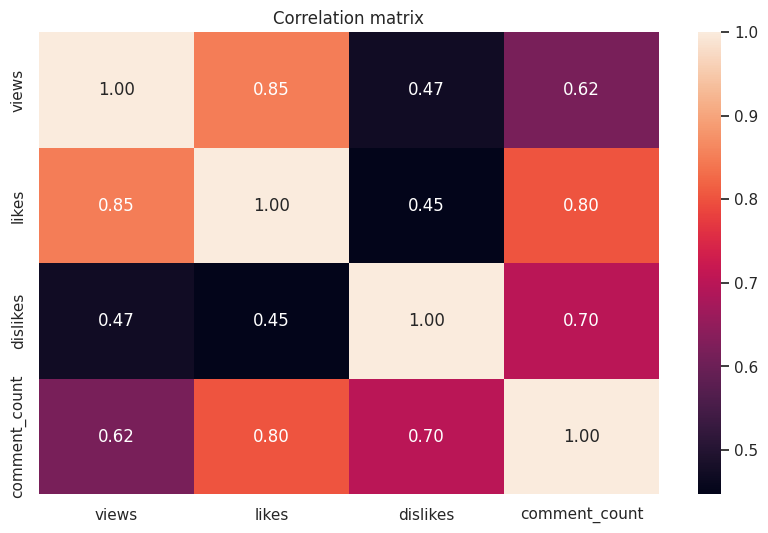

In [ ]:
# Cell 10: Correlation among numeric columns
num_cols = ['views','likes','dislikes','comment_count']
corr = df[num_cols].corr()
print(corr)
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation matrix")
plt.show()


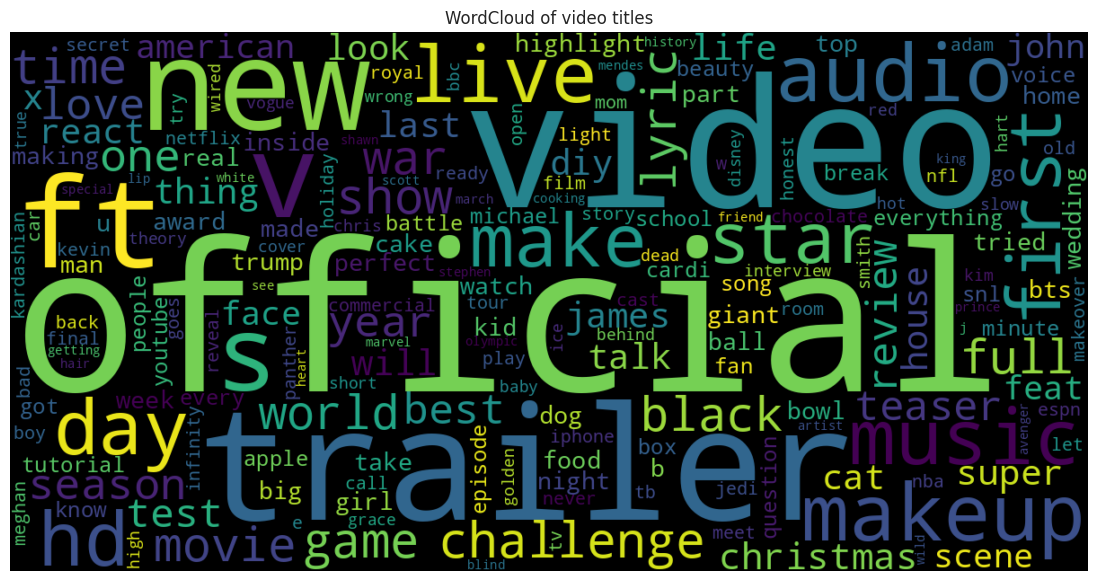

In [ ]:
# Cell 12: Wordcloud for titles (removes stopwords)
text = " ".join(str(t) for t in df['title'].fillna("")).lower()
stopwords = set(STOPWORDS)
wc = WordCloud(width=1200, height=600, stopwords=stopwords, collocations=False).generate(text)

plt.figure(figsize=(15,7))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of video titles")
plt.show()


In [ ]:
# Cell 13: Sentiment polarity of titles (quick)
def title_sentiment(title):
    try:
        return TextBlob(str(title)).sentiment.polarity
    except:
        return 0.0

df['title_sentiment'] = df['title'].apply(title_sentiment)
print("Sample sentiment scores:")
display(df[['title','title_sentiment']].head(10))

# Average sentiment by category (top 10)
sent_by_cat = df.groupby('category_name')['title_sentiment'].mean().sort_values(ascending=False).head(10)
print("Average title sentiment for top categories:")
display(sent_by_cat)


Sample sentiment scores:


,title,title_sentiment
0,WE WANT TO TALK ABOUT OUR MARRIAGE,0.0000
1,The Trump Presidency: Last Week Tonight with J...,0.0000
2,"Racist Superman | Rudy Mancuso, King Bach & Le...",0.0000
3,Nickelback Lyrics: Real or Fake?,-0.7500
4,I Dare You: GOING BALD!?,0.0000
5,2 Weeks with iPhone X,0.0000
6,Roy Moore & Jeff Sessions Cold Open - SNL,-0.3000
7,5 Ice Cream Gadgets put to the Test,0.0000
8,The Greatest Showman | Official Trailer 2 [HD]...,0.5000
9,Why the rise of the robots won’t mean the end ...,-0.3125


Average title sentiment for top categories:


,title_sentiment
category_name,
Travel & Events,0.148664
Autos & Vehicles,0.104205
Sports,0.093788
Music,0.083775
Pets & Animals,0.074847
People & Blogs,0.069841
Film & Animation,0.054763
Howto & Style,0.053986
Entertainment,0.052851
